In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
df = pd.read_csv('/Users/adityajyoti/Documents/BPTS/Congestion Data/co-lab-repo/Night_Light_Data - Night_Light_Data2.csv')

In [52]:
df.head()

,Index,lat,lon,2023,2024
0,1,23.141503,77.485499,17.463333,15.901818
1,2,24.822467,87.966962,12.949167,10.097273
2,3,29.519892,74.335958,2.634167,2.740000
3,4,27.297038,81.541637,1.850833,1.359091
4,5,27.486920,78.792170,17.047501,15.980000


In [53]:
df.shape

(1383, 5)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1383 non-null   int64  
 1   lat     1383 non-null   float64
 2   lon     1383 non-null   float64
 3   2023    1383 non-null   float64
 4   2024    1383 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 54.1 KB


In [55]:
df.describe()

,Index,lat,lon,2023,2024
count,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,692.000000,22.444381,77.958584,8.399812,8.565292
std,399.382023,5.708910,4.162351,9.435265,9.442978
min,1.000000,8.206201,23.608470,1.000000,1.000000
25%,346.500000,18.504221,75.426296,2.338333,2.339545
50%,692.000000,23.310689,77.501694,5.151667,5.505455
75%,1037.500000,26.630778,79.714857,10.739167,10.840909
max,1383.000000,75.150805,93.138524,71.716667,70.114548


In [56]:
# df.drop(columns='Index', inplace=True)

In [60]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Index    0
lat      0
lon      0
2023     0
2024     0
dtype: int64


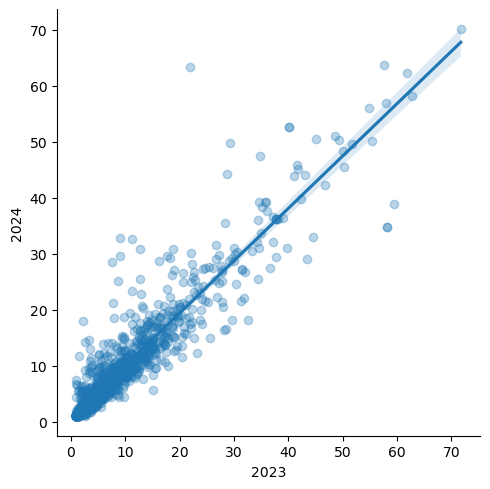

In [61]:
sns.lmplot(x='2023', y='2024', data=df, scatter_kws={'alpha':0.3})
plt.show()

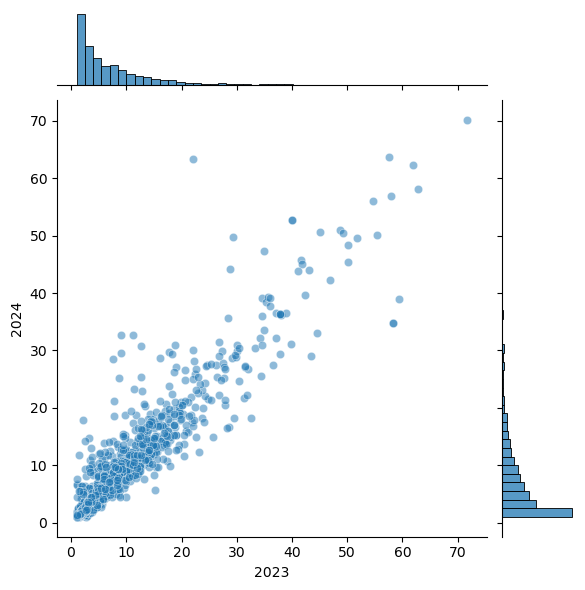

In [62]:
sns.jointplot(x='2023', y='2024', data=df, alpha=0.5)
plt.show()

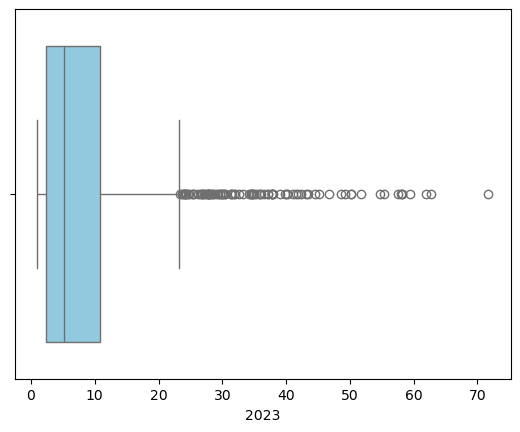

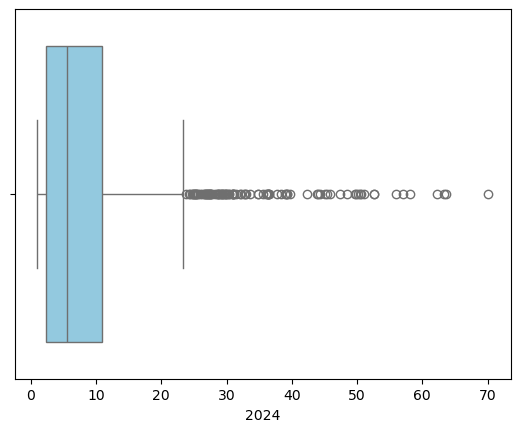

In [63]:
for col in ['2023', '2024']:
    sns.boxplot(x=df[col], color='skyblue')
    plt.show()

In [64]:
# Splitting Data (Input: 2023, Output: 2024)
X = df[['2023']].values
y = df['2024'].values

In [65]:
# Splitting into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [66]:
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [67]:
# Creating & Training Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# Model Coefficients
print(f'Coefficient (w): {model.coef_[0]}')
print(f'Intercept (b): {model.intercept_}')

Coefficient (w): 8.501797544818153
Intercept (b): 8.370039447641952


In [69]:
y_pred = model.predict(X_test)

In [70]:
# Model Evaluation
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R² Score: {r2_score(y_test, y_pred)}')

MSE: 13.934743971681735
R² Score: 0.8762099881634998


In [75]:
rmse = np.sqrt(13.934743971681735)
print("RMSE:", rmse)

RMSE: 3.732926997904156


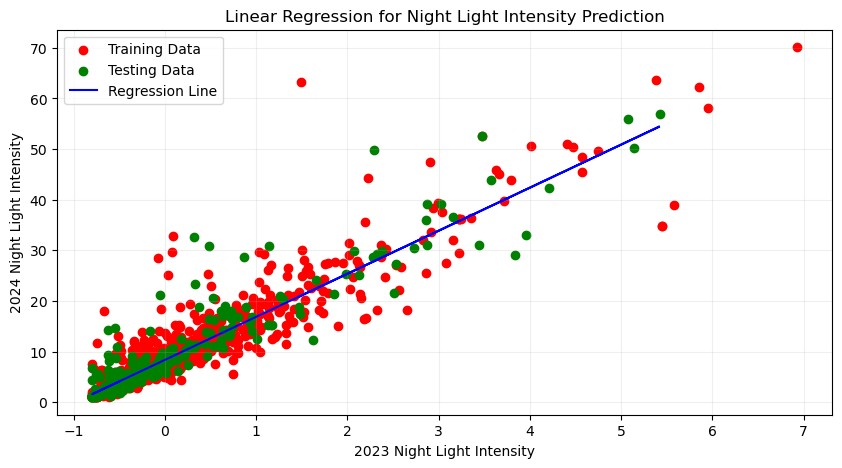

In [71]:
# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='red', label="Training Data")  
plt.scatter(X_test, y_test, color='green', label='Testing Data')  
plt.plot(X_test, y_pred, color='blue', label="Regression Line")  
plt.xlabel('2023 Night Light Intensity')
plt.ylabel('2024 Night Light Intensity')
plt.title('Linear Regression for Night Light Intensity Prediction')
plt.legend()
plt.grid(alpha=0.2)
plt.show()


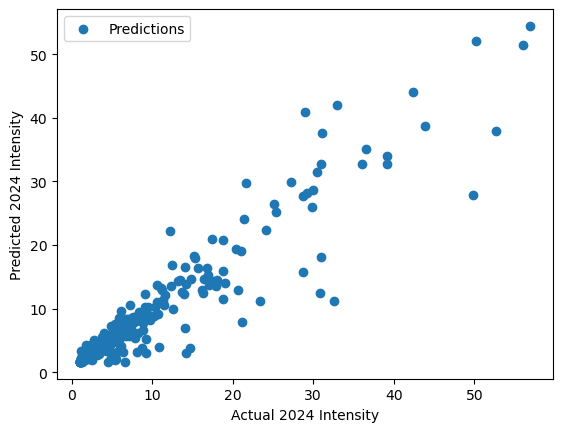

In [72]:
# Scatter plot for predicted vs actual values
plt.scatter(y_test, y_pred, label='Predictions')
plt.xlabel('Actual 2024 Intensity')
plt.ylabel('Predicted 2024 Intensity')
plt.legend()
plt.show()

In [73]:
# Predicting 2025 Intensity
df['2025_predicted'] = model.predict(scaler.transform(df[['2024']]))
display(df[['Index', '2023', '2024', '2025_predicted']])

/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,Index,2023,2024,2025_predicted
0,1,17.463333,15.901818,15.439174
1,2,12.949167,10.097273,10.051056
2,3,2.634167,2.740000,3.221606
3,4,1.850833,1.359091,1.939765
4,5,17.047501,15.980000,15.511747
...,...,...,...,...
1378,1379,1.615833,1.457273,2.030903
1379,1380,28.259167,16.401817,15.903303
1380,1381,2.675000,2.256364,2.772666
1381,1382,1.090000,1.362727,1.943141


In [74]:
# Save new CSV file with predictions
df.to_csv('night_light_predictions.csv', index=False)

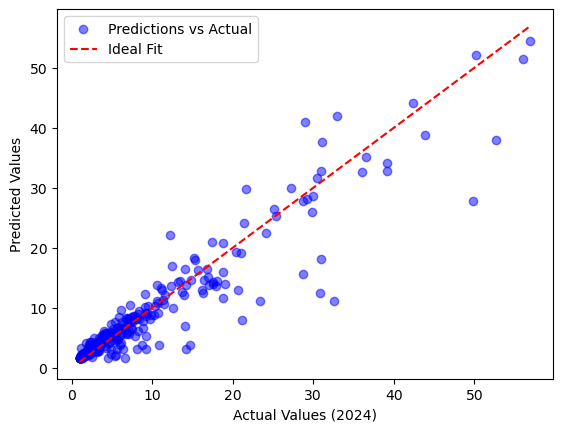

In [78]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Ideal Fit")
plt.xlabel("Actual Values (2024)")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()
